<a href="https://colab.research.google.com/github/Fentahun60/Fentahun/blob/main/Numerical_Var__ZambiaCC_BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [205]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Path to your .dta file
file_path = '/content/drive/MyDrive/zambia_CC_BC.dta'

# Read the .dta file into a pandas DataFrame
try:
    df = pd.read_stata(file_path)
    print("File imported successfully! First 5 rows:")
    print(df.head())
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please ensure the path is correct and Google Drive is mounted.")
except Exception as e:
    print(f"An error occurred while reading the file: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File imported successfully! First 5 rows:
  v000  v001    v005  v007  v012   v025       v106    v151 v152  \
0  ZM8     1  748300  2024    42  urban    primary    male   44   
1  ZM8     1  748300  2024    42  urban     higher  female   41   
2  ZM8     1  748300  2024    24  urban    primary  female   24   
3  ZM8     1  748300  2024    22  urban  secondary    male   26   
4  ZM8     1  748300  2024    32  urban    primary  female   32   

                   v157  ... v481 v484a v484b  \
0            not at all  ...   no    no    no   
1  at least once a week  ...  yes   yes   yes   
2  at least once a week  ...   no    no    no   
3            not at all  ...   no    no    no   
4  at least once a week  ...   no    no   yes   

                                  v501 v525 v763a v763b v763c v781 v836  
0                              married   22    no    no  

In [206]:
# Assuming your dataframe is df

rename_dict = {
    "v012": "respondent_age",
    "v025": "residence_type",
    "v106": "highest_edu_level",
    "v151": "sex_of_household_head",
    "v152": "age_of_household_head",
    "v157": "freq_read_newspaper",
    "v158": "freq_listen_radio",
    "v159": "freq_watch_tv",
    "v169a": "owns_mobile_phone",
    "v190": "wealth_index",
    "v312": "current_contraceptive_method",
    "v394": "visited_health_facility_12mo",
    "v463a": "smokes_cigarettes",
    "v467b": "permission_to_medical_Vist",
    "v467c": "money_needed_for_medical_vist",
    "v467d": "distance_to_health_facility",
    "v467e": "transport_for_medical_visit",
    "v467k": "waiting_time_concern_at_HF",
    "v481": "covered_by_health_insurance",
    "v484a": "breast_exam_by_provider",
    "v484b": "cervical_cancer_tested",
    "v501": "marital_status",
    "v525": "age_at_first_sex",
    "v763a": "STI_last_12mo",
    "v763b": "genital_sore_last_12mo",
    "v763c": "genital_discharge_last_12mo",
    "v781": "ever_tested_hiv",
    "v836": "total_lifetime_sex_partners"
}

# Apply renaming
df = df.rename(columns=rename_dict)

df.head()


,v000,v001,v005,v007,respondent_age,residence_type,highest_edu_level,sex_of_household_head,age_of_household_head,freq_read_newspaper,...,covered_by_health_insurance,breast_exam_by_provider,cervical_cancer_tested,marital_status,age_at_first_sex,STI_last_12mo,genital_sore_last_12mo,genital_discharge_last_12mo,ever_tested_hiv,total_lifetime_sex_partners
0,ZM8,1,748300,2024,42,urban,primary,male,44,not at all,...,no,no,no,married,22,no,no,no,yes,2.0
1,ZM8,1,748300,2024,42,urban,higher,female,41,at least once a week,...,yes,yes,yes,married,17,no,no,no,yes,3.0
2,ZM8,1,748300,2024,24,urban,primary,female,24,at least once a week,...,no,no,no,no longer living together/separated,16,no,yes,yes,yes,3.0
3,ZM8,1,748300,2024,22,urban,secondary,male,26,not at all,...,no,no,no,married,15,yes,no,no,yes,5.0
4,ZM8,1,748300,2024,32,urban,primary,female,32,at least once a week,...,no,no,yes,never in union,15,no,no,no,yes,3.0


In [207]:
df.columns

Index(['v000', 'v001', 'v005', 'v007', 'respondent_age', 'residence_type',
       'highest_edu_level', 'sex_of_household_head', 'age_of_household_head',
       'freq_read_newspaper', 'freq_listen_radio', 'freq_watch_tv',
       'owns_mobile_phone', 'wealth_index', 'current_contraceptive_method',
       'visited_health_facility_12mo', 'smokes_cigarettes',
       'permission_to_medical_Vist', 'money_needed_for_medical_vist',
       'distance_to_health_facility', 'transport_for_medical_visit',
       'waiting_time_concern_at_HF', 'covered_by_health_insurance',
       'breast_exam_by_provider', 'cervical_cancer_tested', 'marital_status',
       'age_at_first_sex', 'STI_last_12mo', 'genital_sore_last_12mo',
       'genital_discharge_last_12mo', 'ever_tested_hiv',
       'total_lifetime_sex_partners'],
      dtype='object')

In [208]:
df["freq_listen_radio"] = df["freq_listen_radio"].replace({
    "not at all": "No",
    "less than once a week": "No",
    "at least once a week": "Yes",
    "almost every day": "Yes"})

In [209]:
df["freq_watch_tv"] = df["freq_watch_tv"].replace({
    "not at all": "No",
    "less than once a week": "No",
    "at least once a week": "Yes",
    "almost every day": "Yes"})

In [210]:
df["current_contraceptive_method"] = df["current_contraceptive_method"].replace({

    # Hormonal
    "pill": "Hormonal",
    "injections": "Hormonal",
    "implants/norplant": "Hormonal",
    "emergency contraception": "Hormonal",
    "lactational amenorrhea (lam)": "Hormonal",

    # Non-hormonal
    "not using": "Non-Hormonal",
    "iud": "Non-Hormonal",
    "male condom": "Non-Hormonal",
    "female condom": "Non-Hormonal",
    "female sterilization": "Non-Hormonal",
    "periodic abstinence": "Non-Hormonal",
    "withdrawal": "Non-Hormonal",
    "other traditional": "Non-Hormonal",
    "other modern method": "Non-Hormonal",
    "standard days method (sdm)": "Non-Hormonal"
})


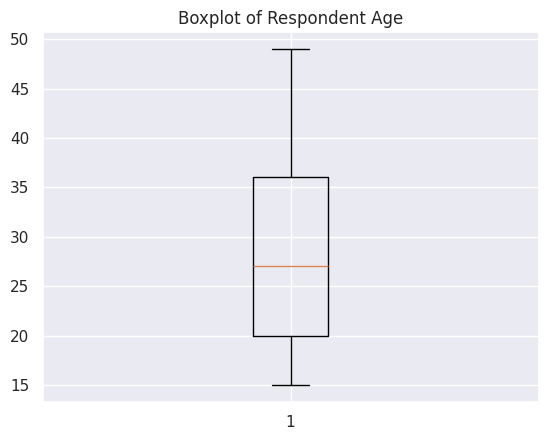

In [211]:
import matplotlib.pyplot as plt

plt.boxplot(df['respondent_age'])
plt.title("Boxplot of Respondent Age")
plt.show()


In [212]:
# Min-Max Normalization
df['respondent_age'] = (df['respondent_age'] - df['respondent_age'].min()) / \
                                  (df['respondent_age'].max() - df['respondent_age'].min())

# Display first few rows to check
print(df[['respondent_age', 'respondent_age']].head())


   respondent_age  respondent_age
0        0.794118        0.794118
1        0.794118        0.794118
2        0.264706        0.264706
3        0.205882        0.205882
4        0.500000        0.500000


In [213]:
import pandas as pd
import numpy as np

# Example: your dataframe is df and the column is 'age_at_first_sex'

def recategorize_age(x):
    # Handle non-numeric values first
    if pd.isna(x):
        return np.nan
    if isinstance(x, str) and x.lower() == "not had sex":
        return "not had sex"

    # Convert to numeric if it's a string number
    try:
        x = float(x)
    except:
        return np.nan

    # Categorize
    if x < 15:
        return "<15"
    elif 15 <= x <= 17:
        return "15-17"
    elif 18 <= x <= 19:
        return "18-19"
    elif x >= 20:
        return ">20"
    else:
        return np.nan

# Apply to dataframe
df["age_at_first_sex"] = df["age_at_first_sex"].apply(recategorize_age)

# View result
df["age_at_first_sex"].value_counts(dropna=False)


,count
age_at_first_sex,
15-17,6497
<15,2392
18-19,2105
not had sex,1707
>20,1250


In [214]:
df['total_lifetime_sex_partners'].dtype
df['total_lifetime_sex_partners'].unique()  # see if there are unexpected strings


[2.0, 3.0, 5.0, 4.0, NaN, ..., 25.0, 35.0, 27.0, 50.0, 29.0]
Length: 29
Categories (28, object): [1.0 < 2.0 < 3.0 < 4.0 ... 47.0 < 50.0 < '95+' < 'don't know']

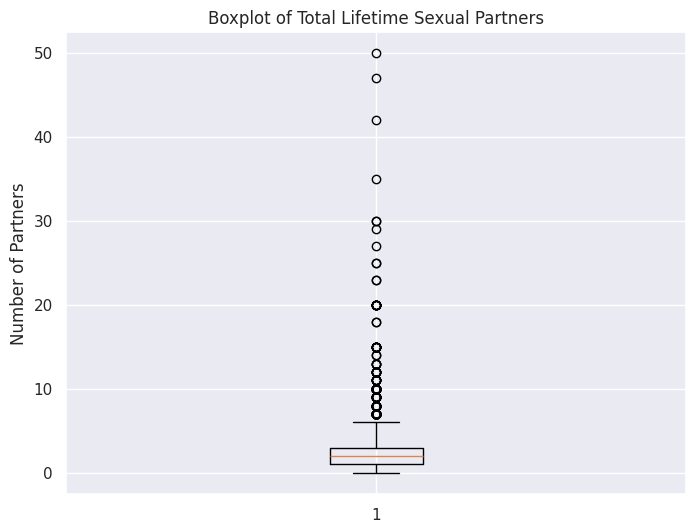

In [215]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace specific strings with 0
df['total_lifetime_sex_partners'] = df['total_lifetime_sex_partners'].replace({
    '95+': 0,
    "don't know": 0
})

# Convert the column to numeric (coerce any other invalid entries to 0)
df['total_lifetime_sex_partners'] = pd.to_numeric(
    df['total_lifetime_sex_partners'], errors='coerce'
).fillna(0)

# Plot the boxplot
plt.figure(figsize=(8,6))
plt.boxplot(df['total_lifetime_sex_partners'])
plt.title("Boxplot of Total Lifetime Sexual Partners")
plt.ylabel("Number of Partners")
plt.show()


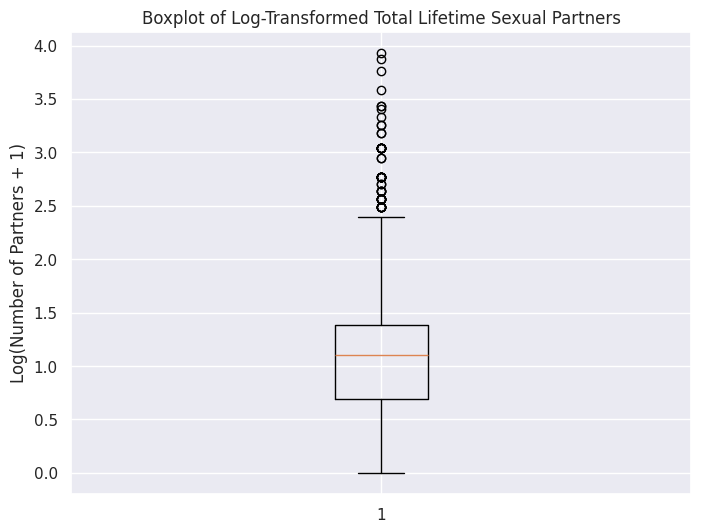

In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Replace specific strings with 0
df['total_lifetime_sex_partners'] = df['total_lifetime_sex_partners'].replace({
    '95+': 0,
    "don't know": 0
})

# Convert the column to numeric (coerce any other invalid entries to 0)
df['total_lifetime_sex_partners'] = pd.to_numeric(
    df['total_lifetime_sex_partners'], errors='coerce'
).fillna(0)

# Apply log transformation (log(x + 1) to handle zeros)
df['total_lifetime_sex_partners'] = np.log1p(df['total_lifetime_sex_partners'])

# Plot the boxplot of log-transformed data
plt.figure(figsize=(8,6))
plt.boxplot(df['total_lifetime_sex_partners'])
plt.title("Boxplot of Log-Transformed Total Lifetime Sexual Partners")
plt.ylabel("Log(Number of Partners + 1)")
plt.show()


In [217]:
missing_percentages = df.isnull().sum() / len(df) * 100
missing_percentages_df = pd.DataFrame({"Missing Percentage": missing_percentages})

print("Percentage of missing values for each variable:")
print(missing_percentages_df)

Percentage of missing values for each variable:
                               Missing Percentage
v000                                          0.0
v001                                          0.0
v005                                          0.0
v007                                          0.0
respondent_age                                0.0
residence_type                                0.0
highest_edu_level                             0.0
sex_of_household_head                         0.0
age_of_household_head                         0.0
freq_read_newspaper                           0.0
freq_listen_radio                             0.0
freq_watch_tv                                 0.0
owns_mobile_phone                             0.0
wealth_index                                  0.0
current_contraceptive_method                  0.0
visited_health_facility_12mo                  0.0
smokes_cigarettes                             0.0
permission_to_medical_Vist                    0.0
mo

In [218]:
df.head()

,v000,v001,v005,v007,respondent_age,residence_type,highest_edu_level,sex_of_household_head,age_of_household_head,freq_read_newspaper,...,covered_by_health_insurance,breast_exam_by_provider,cervical_cancer_tested,marital_status,age_at_first_sex,STI_last_12mo,genital_sore_last_12mo,genital_discharge_last_12mo,ever_tested_hiv,total_lifetime_sex_partners
0,ZM8,1,748300,2024,0.794118,urban,primary,male,44,not at all,...,no,no,no,married,>20,no,no,no,yes,1.098612
1,ZM8,1,748300,2024,0.794118,urban,higher,female,41,at least once a week,...,yes,yes,yes,married,15-17,no,no,no,yes,1.386294
2,ZM8,1,748300,2024,0.264706,urban,primary,female,24,at least once a week,...,no,no,no,no longer living together/separated,15-17,no,yes,yes,yes,1.386294
3,ZM8,1,748300,2024,0.205882,urban,secondary,male,26,not at all,...,no,no,no,married,15-17,yes,no,no,yes,1.791759
4,ZM8,1,748300,2024,0.500000,urban,primary,female,32,at least once a week,...,no,no,yes,never in union,15-17,no,no,no,yes,1.386294


In [219]:
df = df.drop('freq_read_newspaper', axis=1)

In [220]:
df.columns

Index(['v000', 'v001', 'v005', 'v007', 'respondent_age', 'residence_type',
       'highest_edu_level', 'sex_of_household_head', 'age_of_household_head',
       'freq_listen_radio', 'freq_watch_tv', 'owns_mobile_phone',
       'wealth_index', 'current_contraceptive_method',
       'visited_health_facility_12mo', 'smokes_cigarettes',
       'permission_to_medical_Vist', 'money_needed_for_medical_vist',
       'distance_to_health_facility', 'transport_for_medical_visit',
       'waiting_time_concern_at_HF', 'covered_by_health_insurance',
       'breast_exam_by_provider', 'cervical_cancer_tested', 'marital_status',
       'age_at_first_sex', 'STI_last_12mo', 'genital_sore_last_12mo',
       'genital_discharge_last_12mo', 'ever_tested_hiv',
       'total_lifetime_sex_partners'],
      dtype='object')

In [221]:
df.head()

,v000,v001,v005,v007,respondent_age,residence_type,highest_edu_level,sex_of_household_head,age_of_household_head,freq_listen_radio,...,covered_by_health_insurance,breast_exam_by_provider,cervical_cancer_tested,marital_status,age_at_first_sex,STI_last_12mo,genital_sore_last_12mo,genital_discharge_last_12mo,ever_tested_hiv,total_lifetime_sex_partners
0,ZM8,1,748300,2024,0.794118,urban,primary,male,44,No,...,no,no,no,married,>20,no,no,no,yes,1.098612
1,ZM8,1,748300,2024,0.794118,urban,higher,female,41,Yes,...,yes,yes,yes,married,15-17,no,no,no,yes,1.386294
2,ZM8,1,748300,2024,0.264706,urban,primary,female,24,No,...,no,no,no,no longer living together/separated,15-17,no,yes,yes,yes,1.386294
3,ZM8,1,748300,2024,0.205882,urban,secondary,male,26,No,...,no,no,no,married,15-17,yes,no,no,yes,1.791759
4,ZM8,1,748300,2024,0.500000,urban,primary,female,32,No,...,no,no,yes,never in union,15-17,no,no,no,yes,1.386294


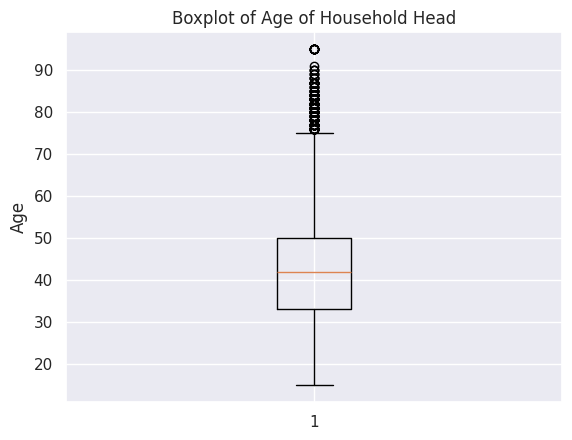

In [222]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert to numeric, invalid entries become NaN
df['age_of_household_head'] = pd.to_numeric(df['age_of_household_head'], errors='coerce')

# Drop NaN values for plotting
ages = df['age_of_household_head'].dropna()

# Plot boxplot
plt.boxplot(ages)
plt.title("Boxplot of Age of Household Head")
plt.ylabel("Age")
plt.show()


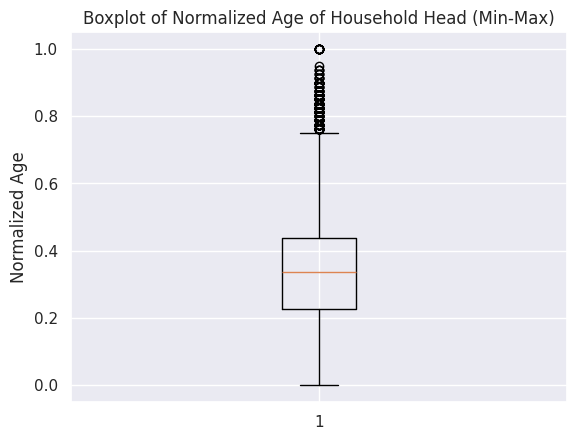

In [223]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert to numeric, invalid entries become NaN
df['age_of_household_head'] = pd.to_numeric(df['age_of_household_head'], errors='coerce')

# Drop NaN values temporarily to compute min and max
ages = df['age_of_household_head'].dropna()

# Min-Max normalization
ages_normalized = (ages - ages.min()) / (ages.max() - ages.min())

# Replace the existing column with normalized values
df.loc[ages_normalized.index, 'age_of_household_head'] = ages_normalized

# Plot boxplot of normalized values
plt.boxplot(df['age_of_household_head'].dropna())
plt.title("Boxplot of Normalized Age of Household Head (Min-Max)")
plt.ylabel("Normalized Age")
plt.show()



In [224]:
df.head()

,v000,v001,v005,v007,respondent_age,residence_type,highest_edu_level,sex_of_household_head,age_of_household_head,freq_listen_radio,...,covered_by_health_insurance,breast_exam_by_provider,cervical_cancer_tested,marital_status,age_at_first_sex,STI_last_12mo,genital_sore_last_12mo,genital_discharge_last_12mo,ever_tested_hiv,total_lifetime_sex_partners
0,ZM8,1,748300,2024,0.794118,urban,primary,male,0.3625,No,...,no,no,no,married,>20,no,no,no,yes,1.098612
1,ZM8,1,748300,2024,0.794118,urban,higher,female,0.3250,Yes,...,yes,yes,yes,married,15-17,no,no,no,yes,1.386294
2,ZM8,1,748300,2024,0.264706,urban,primary,female,0.1125,No,...,no,no,no,no longer living together/separated,15-17,no,yes,yes,yes,1.386294
3,ZM8,1,748300,2024,0.205882,urban,secondary,male,0.1375,No,...,no,no,no,married,15-17,yes,no,no,yes,1.791759
4,ZM8,1,748300,2024,0.500000,urban,primary,female,0.2125,No,...,no,no,yes,never in union,15-17,no,no,no,yes,1.386294


In [225]:
print(df['marital_status'].value_counts(dropna=False))

marital_status
married                                7358
never in union                         4628
divorced                               1050
no longer living together/separated     453
widowed                                 363
living with partner                      99
Name: count, dtype: int64


In [226]:
df['marital_status'] = df['marital_status'].replace({
    'married': 'Married',
    'never in union': 'Single',
    'divorced': 'Divorced',
    'no longer living together/separated': 'Separated',
    'widowed': 'Widowed',
    'living with partner': 'Living with partner'
})

print("Value counts for 'marital_status' after renaming:")
print(df['marital_status'].value_counts(dropna=False))

Value counts for 'marital_status' after renaming:
marital_status
Married                7358
Single                 4628
Divorced               1050
Separated               453
Widowed                 363
Living with partner      99
Name: count, dtype: int64


In [227]:
df.columns

Index(['v000', 'v001', 'v005', 'v007', 'respondent_age', 'residence_type',
       'highest_edu_level', 'sex_of_household_head', 'age_of_household_head',
       'freq_listen_radio', 'freq_watch_tv', 'owns_mobile_phone',
       'wealth_index', 'current_contraceptive_method',
       'visited_health_facility_12mo', 'smokes_cigarettes',
       'permission_to_medical_Vist', 'money_needed_for_medical_vist',
       'distance_to_health_facility', 'transport_for_medical_visit',
       'waiting_time_concern_at_HF', 'covered_by_health_insurance',
       'breast_exam_by_provider', 'cervical_cancer_tested', 'marital_status',
       'age_at_first_sex', 'STI_last_12mo', 'genital_sore_last_12mo',
       'genital_discharge_last_12mo', 'ever_tested_hiv',
       'total_lifetime_sex_partners'],
      dtype='object')

In [228]:
selected_columns = [
    'respondent_age', 'residence_type',
     'highest_edu_level', 'sex_of_household_head', 'age_of_household_head',
       'freq_listen_radio', 'freq_watch_tv', 'owns_mobile_phone',
       'wealth_index', 'current_contraceptive_method',
       'visited_health_facility_12mo', 'smokes_cigarettes',
       'permission_to_medical_Vist', 'money_needed_for_medical_vist',
       'distance_to_health_facility', 'transport_for_medical_visit',
       'waiting_time_concern_at_HF', 'covered_by_health_insurance',
       'breast_exam_by_provider', 'cervical_cancer_tested', 'marital_status',
       'age_at_first_sex', 'STI_last_12mo', 'genital_sore_last_12mo',
       'genital_discharge_last_12mo', 'ever_tested_hiv',
       'total_lifetime_sex_partners'
]

df_selected = df[selected_columns]
display(df_selected.head())

,respondent_age,residence_type,highest_edu_level,sex_of_household_head,age_of_household_head,freq_listen_radio,freq_watch_tv,owns_mobile_phone,wealth_index,current_contraceptive_method,...,covered_by_health_insurance,breast_exam_by_provider,cervical_cancer_tested,marital_status,age_at_first_sex,STI_last_12mo,genital_sore_last_12mo,genital_discharge_last_12mo,ever_tested_hiv,total_lifetime_sex_partners
0,0.794118,urban,primary,male,0.3625,No,No,yes,richer,Non-Hormonal,...,no,no,no,Married,>20,no,no,no,yes,1.098612
1,0.794118,urban,higher,female,0.3250,Yes,Yes,yes,richest,Non-Hormonal,...,yes,yes,yes,Married,15-17,no,no,no,yes,1.386294
2,0.264706,urban,primary,female,0.1125,No,No,yes,richer,Hormonal,...,no,no,no,Separated,15-17,no,yes,yes,yes,1.386294
3,0.205882,urban,secondary,male,0.1375,No,No,yes,middle,Hormonal,...,no,no,no,Married,15-17,yes,no,no,yes,1.791759
4,0.500000,urban,primary,female,0.2125,No,No,yes,poorer,Hormonal,...,no,no,yes,Single,15-17,no,no,no,yes,1.386294


In [229]:
df_selected.columns

Index(['respondent_age', 'residence_type', 'highest_edu_level',
       'sex_of_household_head', 'age_of_household_head', 'freq_listen_radio',
       'freq_watch_tv', 'owns_mobile_phone', 'wealth_index',
       'current_contraceptive_method', 'visited_health_facility_12mo',
       'smokes_cigarettes', 'permission_to_medical_Vist',
       'money_needed_for_medical_vist', 'distance_to_health_facility',
       'transport_for_medical_visit', 'waiting_time_concern_at_HF',
       'covered_by_health_insurance', 'breast_exam_by_provider',
       'cervical_cancer_tested', 'marital_status', 'age_at_first_sex',
       'STI_last_12mo', 'genital_sore_last_12mo',
       'genital_discharge_last_12mo', 'ever_tested_hiv',
       'total_lifetime_sex_partners'],
      dtype='object')

In [230]:
df_selected = df_selected[df_selected['cervical_cancer_tested'] != 'don\'t know']
print("Rows with 'don't know' in 'cervical_cancer_tested' have been removed.")
print(f"New shape of DataFrame: {df_selected.shape}")

Rows with 'don't know' in 'cervical_cancer_tested' have been removed.
New shape of DataFrame: (13909, 27)


In [231]:
df_selected.columns

Index(['respondent_age', 'residence_type', 'highest_edu_level',
       'sex_of_household_head', 'age_of_household_head', 'freq_listen_radio',
       'freq_watch_tv', 'owns_mobile_phone', 'wealth_index',
       'current_contraceptive_method', 'visited_health_facility_12mo',
       'smokes_cigarettes', 'permission_to_medical_Vist',
       'money_needed_for_medical_vist', 'distance_to_health_facility',
       'transport_for_medical_visit', 'waiting_time_concern_at_HF',
       'covered_by_health_insurance', 'breast_exam_by_provider',
       'cervical_cancer_tested', 'marital_status', 'age_at_first_sex',
       'STI_last_12mo', 'genital_sore_last_12mo',
       'genital_discharge_last_12mo', 'ever_tested_hiv',
       'total_lifetime_sex_partners'],
      dtype='object')

In [232]:
df_selected = df_selected.drop(['genital_sore_last_12mo', 'genital_discharge_last_12mo', 'permission_to_medical_Vist', 'transport_for_medical_visit', 'money_needed_for_medical_vist'], axis=1)

In [233]:
df_selected.shape

(13909, 22)

In [234]:
df_selected.head()

,respondent_age,residence_type,highest_edu_level,sex_of_household_head,age_of_household_head,freq_listen_radio,freq_watch_tv,owns_mobile_phone,wealth_index,current_contraceptive_method,...,distance_to_health_facility,waiting_time_concern_at_HF,covered_by_health_insurance,breast_exam_by_provider,cervical_cancer_tested,marital_status,age_at_first_sex,STI_last_12mo,ever_tested_hiv,total_lifetime_sex_partners
0,0.794118,urban,primary,male,0.3625,No,No,yes,richer,Non-Hormonal,...,not a big problem,not a big problem,no,no,no,Married,>20,no,yes,1.098612
1,0.794118,urban,higher,female,0.3250,Yes,Yes,yes,richest,Non-Hormonal,...,not a big problem,not a big problem,yes,yes,yes,Married,15-17,no,yes,1.386294
2,0.264706,urban,primary,female,0.1125,No,No,yes,richer,Hormonal,...,not a big problem,not a big problem,no,no,no,Separated,15-17,no,yes,1.386294
3,0.205882,urban,secondary,male,0.1375,No,No,yes,middle,Hormonal,...,not a big problem,not a big problem,no,no,no,Married,15-17,yes,yes,1.791759
4,0.500000,urban,primary,female,0.2125,No,No,yes,poorer,Hormonal,...,not a big problem,not a big problem,no,no,yes,Single,15-17,no,yes,1.386294


In [235]:
df_selected.dtypes

,0
respondent_age,float64
residence_type,category
highest_edu_level,category
sex_of_household_head,category
age_of_household_head,float64
freq_listen_radio,category
freq_watch_tv,category
owns_mobile_phone,category
wealth_index,category
current_contraceptive_method,category


In [236]:
for column in df_selected.columns:
    print(f"\nCategories in '{column}':")
    print(df_selected[column].unique())



Categories in 'respondent_age':
[0.79411765 0.26470588 0.20588235 0.5        0.61764706 0.32352941
 0.23529412 0.41176471 1.         0.11764706 0.05882353 0.97058824
 0.85294118 0.14705882 0.88235294 0.52941176 0.67647059 0.91176471
 0.02941176 0.08823529 0.55882353 0.82352941 0.17647059 0.76470588
 0.64705882 0.29411765 0.44117647 0.73529412 0.94117647 0.38235294
 0.35294118 0.47058824 0.         0.70588235 0.58823529]

Categories in 'residence_type':
['urban', 'rural']
Categories (2, object): ['urban' < 'rural']

Categories in 'highest_edu_level':
['primary', 'higher', 'secondary', 'no education']
Categories (4, object): ['no education' < 'primary' < 'secondary' < 'higher']

Categories in 'sex_of_household_head':
['male', 'female']
Categories (2, object): ['male' < 'female']

Categories in 'age_of_household_head':
[0.3625 0.325  0.1125 0.1375 0.2125 0.2625 0.1    0.1875 0.55   0.3125
 0.475  0.6875 0.45   0.375  0.225  0.3875 0.6    0.625  0.275  0.125
 0.4625 0.0625 0.2375 0.0875 0

In [237]:
import pandas as pd
import numpy as np

# Replace "don't know" with NaN
df_selected = df_selected.replace("don't know", np.nan)

# Mode imputation for each column
for column in df_selected.columns:
    if df_selected[column].isnull().any():
        mode_value = df_selected[column].mode(dropna=True)[0]  # Get the most frequent value
        # Fix: Avoid inplace=True on a potentially read-only view by reassigning
        df_selected[column] = df_selected[column].fillna(mode_value)

# Optional: check the updated dataframe
print(df_selected.head())

   respondent_age residence_type highest_edu_level sex_of_household_head  \
0        0.794118          urban           primary                  male   
1        0.794118          urban            higher                female   
2        0.264706          urban           primary                female   
3        0.205882          urban         secondary                  male   
4        0.500000          urban           primary                female   

   age_of_household_head freq_listen_radio freq_watch_tv owns_mobile_phone  \
0                 0.3625                No            No               yes   
1                 0.3250               Yes           Yes               yes   
2                 0.1125                No            No               yes   
3                 0.1375                No            No               yes   
4                 0.2125                No            No               yes   

  wealth_index current_contraceptive_method  ... distance_to_health_facili

In [238]:
for column in df_selected.columns:
    print(f"\nCategories in '{column}':")
    print(df_selected[column].unique())


Categories in 'respondent_age':
[0.79411765 0.26470588 0.20588235 0.5        0.61764706 0.32352941
 0.23529412 0.41176471 1.         0.11764706 0.05882353 0.97058824
 0.85294118 0.14705882 0.88235294 0.52941176 0.67647059 0.91176471
 0.02941176 0.08823529 0.55882353 0.82352941 0.17647059 0.76470588
 0.64705882 0.29411765 0.44117647 0.73529412 0.94117647 0.38235294
 0.35294118 0.47058824 0.         0.70588235 0.58823529]

Categories in 'residence_type':
['urban', 'rural']
Categories (2, object): ['urban' < 'rural']

Categories in 'highest_edu_level':
['primary', 'higher', 'secondary', 'no education']
Categories (4, object): ['no education' < 'primary' < 'secondary' < 'higher']

Categories in 'sex_of_household_head':
['male', 'female']
Categories (2, object): ['male' < 'female']

Categories in 'age_of_household_head':
[0.3625 0.325  0.1125 0.1375 0.2125 0.2625 0.1    0.1875 0.55   0.3125
 0.475  0.6875 0.45   0.375  0.225  0.3875 0.6    0.625  0.275  0.125
 0.4625 0.0625 0.2375 0.0875 0

In [239]:
df_selected.shape

(13909, 22)

In [240]:
df_selected.dtypes

,0
respondent_age,float64
residence_type,category
highest_edu_level,category
sex_of_household_head,category
age_of_household_head,float64
freq_listen_radio,category
freq_watch_tv,category
owns_mobile_phone,category
wealth_index,category
current_contraceptive_method,category


In [241]:
df_selected.columns

Index(['respondent_age', 'residence_type', 'highest_edu_level',
       'sex_of_household_head', 'age_of_household_head', 'freq_listen_radio',
       'freq_watch_tv', 'owns_mobile_phone', 'wealth_index',
       'current_contraceptive_method', 'visited_health_facility_12mo',
       'smokes_cigarettes', 'distance_to_health_facility',
       'waiting_time_concern_at_HF', 'covered_by_health_insurance',
       'breast_exam_by_provider', 'cervical_cancer_tested', 'marital_status',
       'age_at_first_sex', 'STI_last_12mo', 'ever_tested_hiv',
       'total_lifetime_sex_partners'],
      dtype='object')

In [242]:
for column in df_selected.columns:
    print(f"\nCategories in '{column}':")
    print(df_selected[column].unique())


Categories in 'respondent_age':
[0.79411765 0.26470588 0.20588235 0.5        0.61764706 0.32352941
 0.23529412 0.41176471 1.         0.11764706 0.05882353 0.97058824
 0.85294118 0.14705882 0.88235294 0.52941176 0.67647059 0.91176471
 0.02941176 0.08823529 0.55882353 0.82352941 0.17647059 0.76470588
 0.64705882 0.29411765 0.44117647 0.73529412 0.94117647 0.38235294
 0.35294118 0.47058824 0.         0.70588235 0.58823529]

Categories in 'residence_type':
['urban', 'rural']
Categories (2, object): ['urban' < 'rural']

Categories in 'highest_edu_level':
['primary', 'higher', 'secondary', 'no education']
Categories (4, object): ['no education' < 'primary' < 'secondary' < 'higher']

Categories in 'sex_of_household_head':
['male', 'female']
Categories (2, object): ['male' < 'female']

Categories in 'age_of_household_head':
[0.3625 0.325  0.1125 0.1375 0.2125 0.2625 0.1    0.1875 0.55   0.3125
 0.475  0.6875 0.45   0.375  0.225  0.3875 0.6    0.625  0.275  0.125
 0.4625 0.0625 0.2375 0.0875 0

In [243]:
df_selected.head()

,respondent_age,residence_type,highest_edu_level,sex_of_household_head,age_of_household_head,freq_listen_radio,freq_watch_tv,owns_mobile_phone,wealth_index,current_contraceptive_method,...,distance_to_health_facility,waiting_time_concern_at_HF,covered_by_health_insurance,breast_exam_by_provider,cervical_cancer_tested,marital_status,age_at_first_sex,STI_last_12mo,ever_tested_hiv,total_lifetime_sex_partners
0,0.794118,urban,primary,male,0.3625,No,No,yes,richer,Non-Hormonal,...,not a big problem,not a big problem,no,no,no,Married,>20,no,yes,1.098612
1,0.794118,urban,higher,female,0.3250,Yes,Yes,yes,richest,Non-Hormonal,...,not a big problem,not a big problem,yes,yes,yes,Married,15-17,no,yes,1.386294
2,0.264706,urban,primary,female,0.1125,No,No,yes,richer,Hormonal,...,not a big problem,not a big problem,no,no,no,Separated,15-17,no,yes,1.386294
3,0.205882,urban,secondary,male,0.1375,No,No,yes,middle,Hormonal,...,not a big problem,not a big problem,no,no,no,Married,15-17,yes,yes,1.791759
4,0.500000,urban,primary,female,0.2125,No,No,yes,poorer,Hormonal,...,not a big problem,not a big problem,no,no,yes,Single,15-17,no,yes,1.386294


In [244]:
encoding_maps = {
    'residence_type': {
        'urban': 0,
        'rural': 1
    },

    'highest_edu_level': {
        'no education': 0,
        'primary': 1,
        'secondary': 2,
        'higher': 3
    },

    'sex_of_household_head': {
        'male': 1,
        'female': 0
    },

    'freq_listen_radio': {
        'No': 0,
        'Yes': 1
    },

    'freq_watch_tv': {
        'No': 0,
        'Yes': 1
    },

    'owns_mobile_phone': {
        'no': 0,
        'yes': 1
    },

    'wealth_index': {
        'poorest': 1,
        'poorer': 2,
        'middle': 3,
        'richer': 4,
        'richest': 5
    },

    'current_contraceptive_method': {
        'Non-Hormonal': 0,
        'Hormonal': 1
    },

    'visited_health_facility_12mo': {
        'yes': 1,
        'no': 0
    },

    'smokes_cigarettes': {
        'no': 0,
        'yes': 1
    },

    'distance_to_health_facility': {
        'not a big problem': 0,
        'big problem': 1
    },

    'waiting_time_concern_at_HF': {
        'not a big problem': 0,
        'big problem': 1
    },

    'covered_by_health_insurance': {
        'no': 0,
        'yes': 1
    },

    'breast_exam_by_provider': {
        'no': 0,
        'yes': 1
    },

    'cervical_cancer_tested': {
        'no': 0,
        'yes': 1
    },

    'marital_status': {
        'Single': 1,
        'Married': 3,
        'Living with partner': 2,
        'Widowed': 6,
        'Divorced': 5,
        'Separated': 4
    },

    'age_at_first_sex': {
        'not had sex': 1,
        '<15': 2,
        '15-17': 3,
        '18-19': 4,
        '>20': 5
    },

    'STI_last_12mo': {
        'no': 0,
        'yes': 1
    },

    'ever_tested_hiv': {
        'yes': 1,
        'no': 0
    }
}


In [245]:
for col, mapping in encoding_maps.items():
    if col in df_selected.columns:
        df_selected[col] = df_selected[col].map(mapping)

        # Check unmapped values
        unmatched = set(df_selected[col].isna().index)


In [246]:
df_selected.head()

,respondent_age,residence_type,highest_edu_level,sex_of_household_head,age_of_household_head,freq_listen_radio,freq_watch_tv,owns_mobile_phone,wealth_index,current_contraceptive_method,...,distance_to_health_facility,waiting_time_concern_at_HF,covered_by_health_insurance,breast_exam_by_provider,cervical_cancer_tested,marital_status,age_at_first_sex,STI_last_12mo,ever_tested_hiv,total_lifetime_sex_partners
0,0.794118,0,1,1,0.3625,0,0,1,4,0,...,0,0,0,0,0,3,5,0,1,1.098612
1,0.794118,0,3,0,0.3250,1,1,1,5,0,...,0,0,1,1,1,3,3,0,1,1.386294
2,0.264706,0,1,0,0.1125,0,0,1,4,1,...,0,0,0,0,0,4,3,0,1,1.386294
3,0.205882,0,2,1,0.1375,0,0,1,3,1,...,0,0,0,0,0,3,3,1,1,1.791759
4,0.500000,0,1,0,0.2125,0,0,1,2,1,...,0,0,0,0,1,1,3,0,1,1.386294


In [247]:
df_selected.columns

Index(['respondent_age', 'residence_type', 'highest_edu_level',
       'sex_of_household_head', 'age_of_household_head', 'freq_listen_radio',
       'freq_watch_tv', 'owns_mobile_phone', 'wealth_index',
       'current_contraceptive_method', 'visited_health_facility_12mo',
       'smokes_cigarettes', 'distance_to_health_facility',
       'waiting_time_concern_at_HF', 'covered_by_health_insurance',
       'breast_exam_by_provider', 'cervical_cancer_tested', 'marital_status',
       'age_at_first_sex', 'STI_last_12mo', 'ever_tested_hiv',
       'total_lifetime_sex_partners'],
      dtype='object')

In [248]:
rename_map = {
    'respondent_age': 'age',
    'residence_type': 'residence',
    'highest_edu_level': 'education_level',
    'sex_of_household_head': 'household_head_sex',
    'age_of_household_head': 'household_head_age',
    'freq_listen_radio': 'listen_radio',
    'freq_watch_tv': 'watch_tv',
    'owns_mobile_phone': 'mobile_phone',
    'wealth_index': 'wealth_index',
    'current_contraceptive_method': 'contraceptive_method',
    'visited_health_facility_12mo': 'visited_health_facility_12mo',
    'smokes_cigarettes': 'smokes_cigarettes',
    'distance_to_health_facility': 'distance_to_Helth_facility',
    'waiting_time_concern_at_HF': 'facility_waiting_time',
    'covered_by_health_insurance': 'health_insurance',
    'breast_exam_by_provider': 'breast_exam',
    'cervical_cancer_tested': 'cervical_cancer_screened',
    'marital_status': 'marital_status',
    'age_at_first_sex': 'age_first_sex',
    'STI_last_12mo': 'STI_last12mo',
    'ever_tested_hiv': 'ever_tested_hiv',
    'total_lifetime_sex_partners': 'lifetime_sex_partners'
}

df_selected = df_selected.rename(columns=rename_map)


In [249]:
df_selected.head()

,age,residence,education_level,household_head_sex,household_head_age,listen_radio,watch_tv,mobile_phone,wealth_index,contraceptive_method,...,distance_to_Helth_facility,facility_waiting_time,health_insurance,breast_exam,cervical_cancer_screened,marital_status,age_first_sex,STI_last12mo,ever_tested_hiv,lifetime_sex_partners
0,0.794118,0,1,1,0.3625,0,0,1,4,0,...,0,0,0,0,0,3,5,0,1,1.098612
1,0.794118,0,3,0,0.3250,1,1,1,5,0,...,0,0,1,1,1,3,3,0,1,1.386294
2,0.264706,0,1,0,0.1125,0,0,1,4,1,...,0,0,0,0,0,4,3,0,1,1.386294
3,0.205882,0,2,1,0.1375,0,0,1,3,1,...,0,0,0,0,0,3,3,1,1,1.791759
4,0.500000,0,1,0,0.2125,0,0,1,2,1,...,0,0,0,0,1,1,3,0,1,1.386294


In [252]:
df_selected.isna().sum()

,0
age,0
residence,0
education_level,0
household_head_sex,0
household_head_age,0
listen_radio,0
watch_tv,0
mobile_phone,0
wealth_index,0
contraceptive_method,0


In [258]:
df_selected.dtypes

,0
age,float64
residence,category
education_level,category
household_head_sex,category
household_head_age,float64
listen_radio,category
watch_tv,category
mobile_phone,category
wealth_index,category
contraceptive_method,category


In [259]:
import pandas as pd

# Convert all columns to numeric, invalid parsing will be set as NaN
df_selected = df_selected.apply(pd.to_numeric, errors='coerce')

# Check the result
print(df_selected.dtypes)


age                             float64
residence                         int64
education_level                   int64
household_head_sex                int64
household_head_age              float64
listen_radio                      int64
watch_tv                          int64
mobile_phone                      int64
wealth_index                      int64
contraceptive_method              int64
visited_health_facility_12mo      int64
smokes_cigarettes                 int64
distance_to_Helth_facility        int64
facility_waiting_time             int64
health_insurance                  int64
breast_exam                       int64
cervical_cancer_screened          int64
marital_status                    int64
age_first_sex                     int64
STI_last12mo                      int64
ever_tested_hiv                   int64
lifetime_sex_partners           float64
dtype: object


In [260]:
df_selected.columns

Index(['age', 'residence', 'education_level', 'household_head_sex',
       'household_head_age', 'listen_radio', 'watch_tv', 'mobile_phone',
       'wealth_index', 'contraceptive_method', 'visited_health_facility_12mo',
       'smokes_cigarettes', 'distance_to_Helth_facility',
       'facility_waiting_time', 'health_insurance', 'breast_exam',
       'cervical_cancer_screened', 'marital_status', 'age_first_sex',
       'STI_last12mo', 'ever_tested_hiv', 'lifetime_sex_partners'],
      dtype='object')

In [261]:
# --- Define target and features ---
y = df_selected["cervical_cancer_screened"]
X = df_selected.drop(columns=["cervical_cancer_screened"])

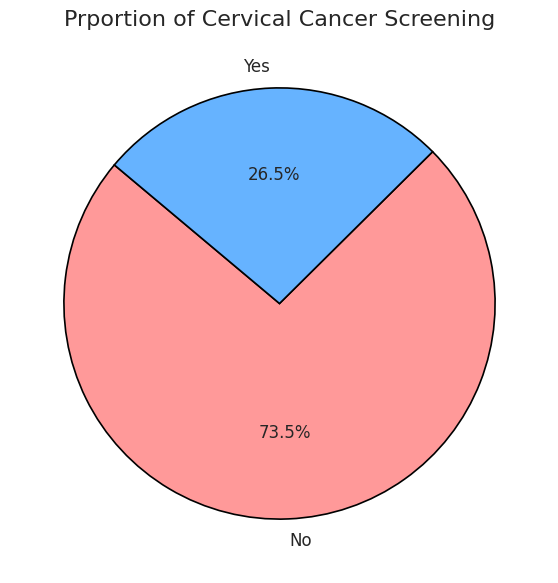

In [262]:
import matplotlib.pyplot as plt

# Map 0/1 to No/Yes
y_mapped = df_selected["cervical_cancer_screened"].map({0: "No", 1: "Yes"})

# Calculate counts
counts = y_mapped.value_counts()
labels = counts.index
sizes = counts.values
colors = ['#ff9999','#66b3ff']  # Nice color palette

# Plot pie chart
plt.figure(figsize=(7,7))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',  # Show percentage
    startangle=140,     # Rotation
    colors=colors,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.2},  # Black border for wedges
    textprops={'fontsize': 12}
)
plt.title("Prportion of Cervical Cancer Screening", fontsize=16)
plt.show()


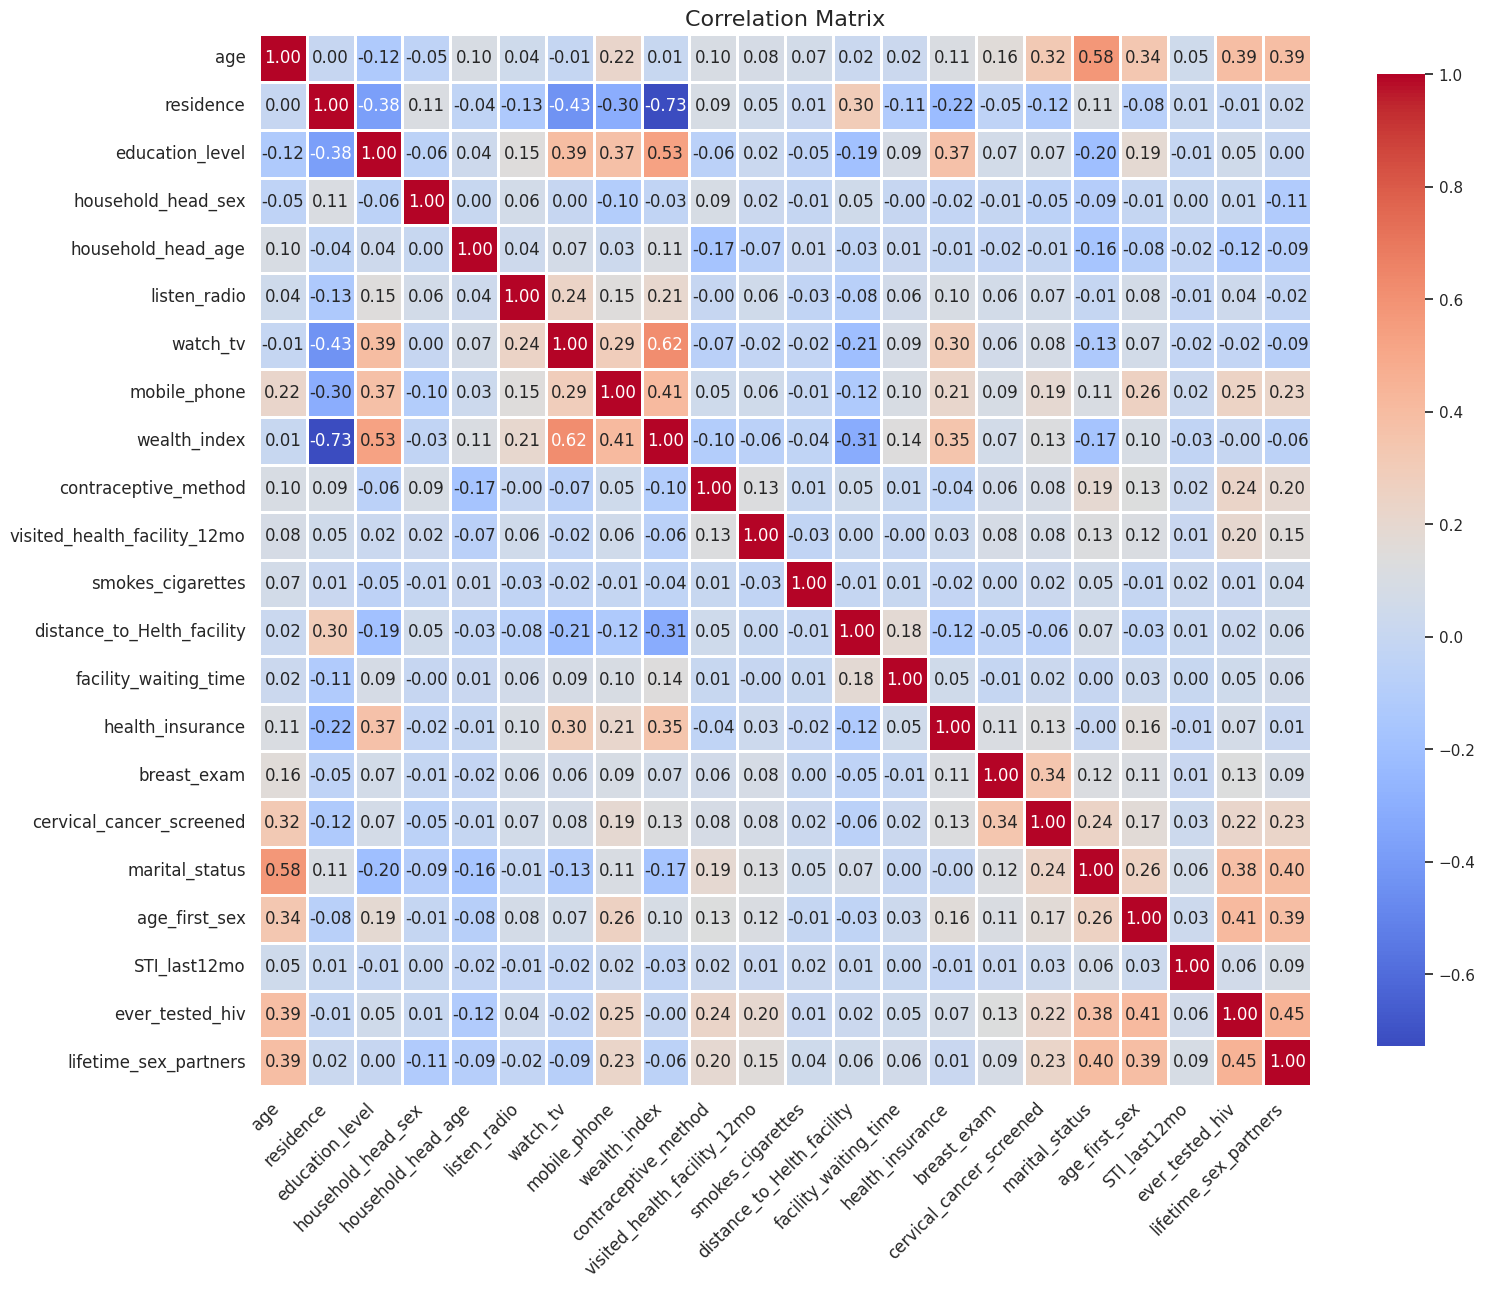

In [263]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric features
numeric_features = df_selected.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_features.corr()

# Display correlation matrix as a heatmap
plt.figure(figsize=(16, 14))  # Increased figure size
sns.set(font_scale=1)       # Increase font scale for better readability
sns.heatmap(
    corr_matrix,
    annot=True,                # Show correlation values
    fmt=".2f",                 # Format
    cmap="coolwarm",           # Color map
    linewidths=1,              # Line width between cells
    cbar_kws={'shrink': 0.8}, # Colorbar size
    square=True
)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.title("Correlation Matrix", fontsize=16)
plt.tight_layout()
plt.show()


In [264]:
df_selected=df_selected.drop(['residence'],axis=1) # have higher correlation with wealth index

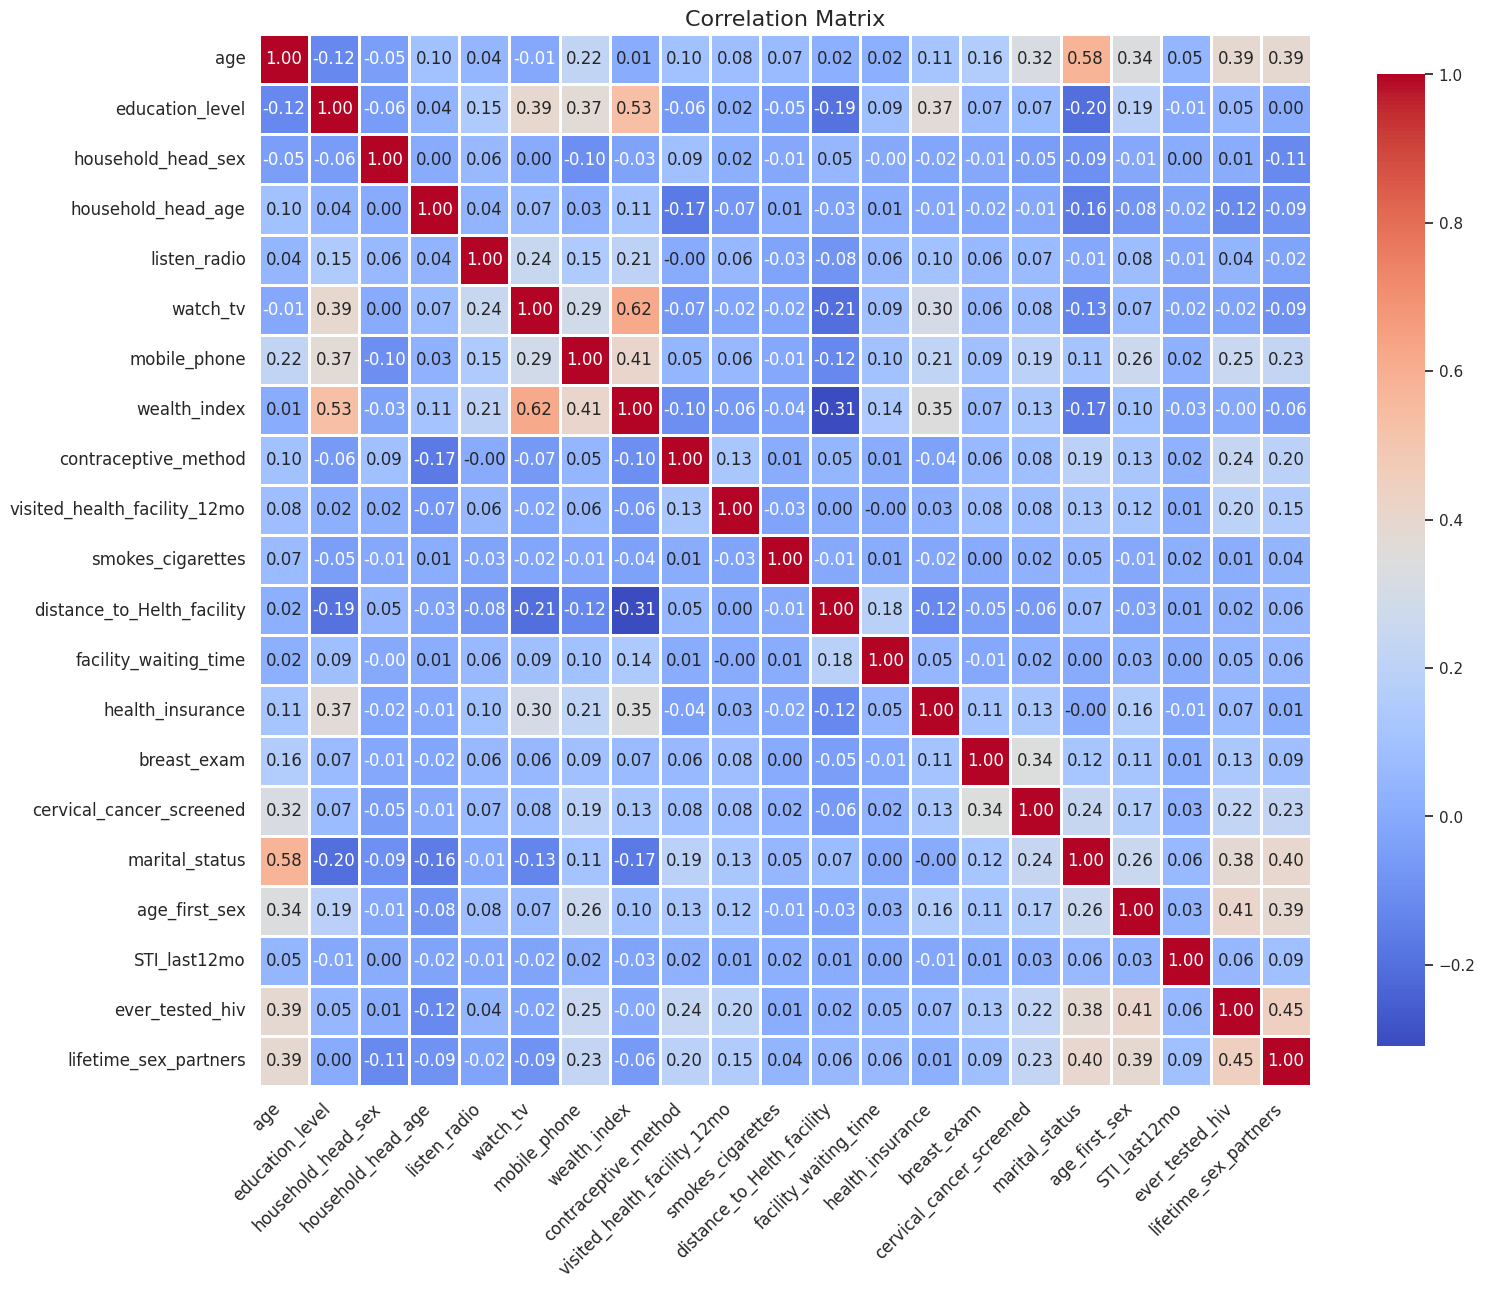

In [265]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric features
numeric_features = df_selected.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_features.corr()

# Display correlation matrix as a heatmap
plt.figure(figsize=(16, 14))  # Increased figure size
sns.set(font_scale=1)       # Increase font scale for better readability
sns.heatmap(
    corr_matrix,
    annot=True,                # Show correlation values
    fmt=".2f",                 # Format
    cmap="coolwarm",           # Color map
    linewidths=1,              # Line width between cells
    cbar_kws={'shrink': 0.8}, # Colorbar size
    square=True
)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.title("Correlation Matrix", fontsize=16)
plt.tight_layout()
plt.show()


In [266]:
from sklearn.model_selection import train_test_split

# Assuming X contains features and y contains the target
# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,       # 20% for testing
    random_state=42,     # for reproducibility
    stratify=y           # keeps class distribution same in train and test
)

# Check the shape
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train distribution:\n", y_train.value_counts())
print("y_test distribution:\n", y_test.value_counts())


X_train: (11127, 21)
X_test: (2782, 21)
y_train distribution:
 cervical_cancer_screened
0    8183
1    2944
Name: count, dtype: int64
y_test distribution:
 cervical_cancer_screened
0    2046
1     736
Name: count, dtype: int64


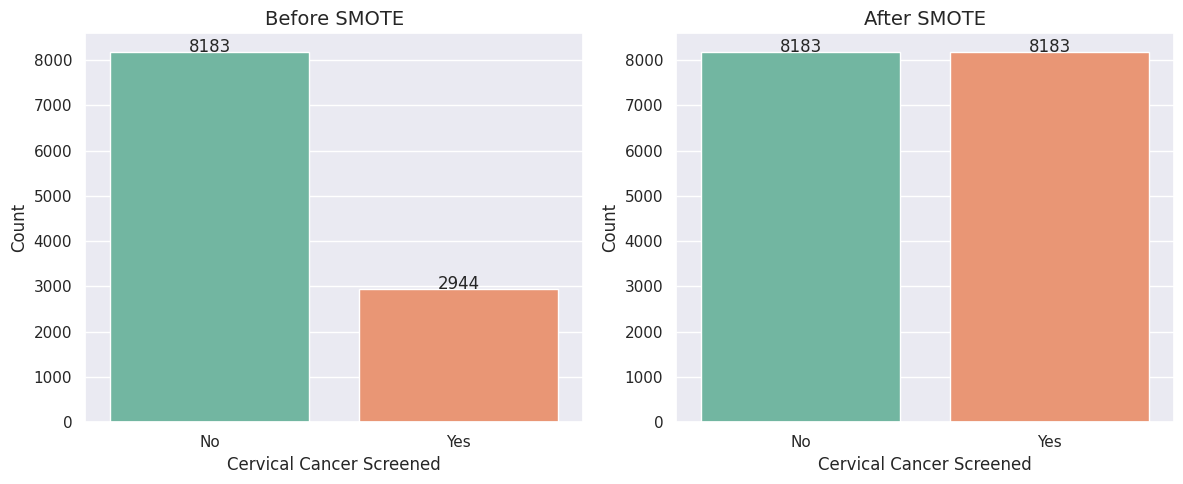

In [267]:
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
import pandas as pd

# ensure using training set only
y_train_mapped = y_train.map({0: "No", 1: "Yes"})

# Apply SMOTE on training data only
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

y_train_res_mapped = pd.Series(y_train_res).map({0: "No", 1: "Yes"})

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
order = ["No", "Yes"]  # explicit category order used for both plots

# Before SMOTE
sns.countplot(x=y_train_mapped, order=order, palette="Set2", ax=axes[0])
axes[0].set_title("Before SMOTE", fontsize=14)
axes[0].set_xlabel("Cervical Cancer Screened", fontsize=12)
axes[0].set_ylabel("Count", fontsize=12)

# Annotate counts by reading bar heights (robust)
for p in axes[0].patches:
    height = int(p.get_height())
    axes[0].text(p.get_x() + p.get_width() / 2., height + 5, str(height),
                 ha="center", fontsize=12)

# After SMOTE
sns.countplot(x=y_train_res_mapped, order=order, palette="Set2", ax=axes[1])
axes[1].set_title("After SMOTE", fontsize=14)
axes[1].set_xlabel("Cervical Cancer Screened", fontsize=12)
axes[1].set_ylabel("Count", fontsize=12)

for p in axes[1].patches:
    height = int(p.get_height())
    axes[1].text(p.get_x() + p.get_width() / 2., height + 5, str(height),
                 ha="center", fontsize=12)

plt.tight_layout()
plt.show()


Feature Ranking (1 = most important):
                         Feature  Rank  Selected
0                            age     1      True
1                      residence     1      True
2                education_level     1      True
4             household_head_age     1      True
5                   listen_radio     1      True
15                   breast_exam     1      True
9           contraceptive_method     1      True
8                   wealth_index     1      True
20         lifetime_sex_partners     1      True
19               ever_tested_hiv     1      True
17                 age_first_sex     1      True
16                marital_status     1      True
10  visited_health_facility_12mo     2     False
7                   mobile_phone     3     False
13         facility_waiting_time     4     False
12    distance_to_Helth_facility     5     False
3             household_head_sex     6     False
6                       watch_tv     7     False
14              health_insuranc

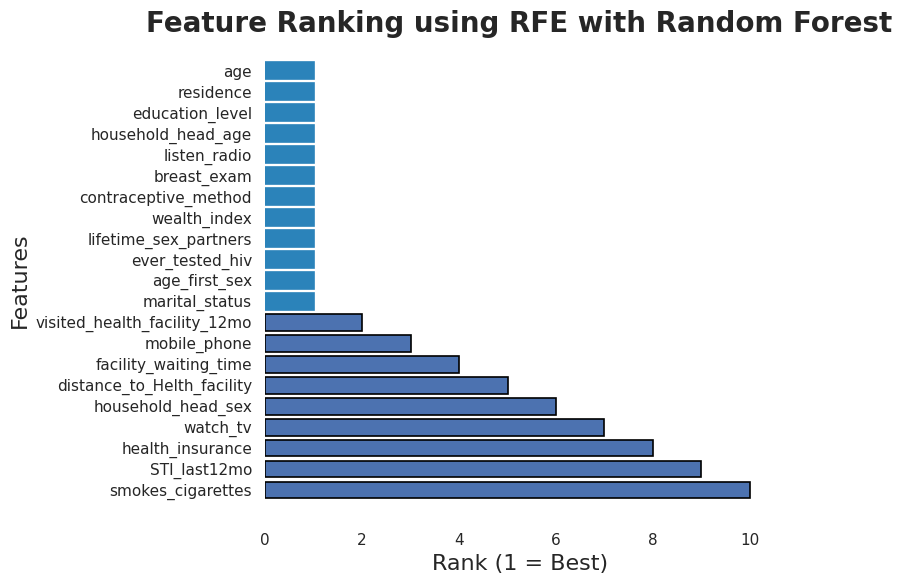


Top Selected Features:
                  Feature  Rank  Selected
0                     age     1      True
1               residence     1      True
2         education_level     1      True
4      household_head_age     1      True
5            listen_radio     1      True
15            breast_exam     1      True
9    contraceptive_method     1      True
8            wealth_index     1      True
20  lifetime_sex_partners     1      True
19        ever_tested_hiv     1      True
17          age_first_sex     1      True
16         marital_status     1      True


In [270]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# ---------------------------
# 1. Initialize Random Forest
# ---------------------------
rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight=None  # SMOTE already used
)

# ---------------------------
# 2. Apply RFE on the resampled training data
# ---------------------------
# Select how many top features to keep (optional)
n_features_to_select = 12  # You can change this

rfe = RFE(
    estimator=rf,
    n_features_to_select=n_features_to_select,
    step=1
)

rfe.fit(X_train_res, y_train_res)

# ---------------------------
# 3. Extract ranking results
# ---------------------------
ranking_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Rank": rfe.ranking_,
    "Selected": rfe.support_
}).sort_values(by="Rank")

print("Feature Ranking (1 = most important):")
print(ranking_df)

# ---------------------------
# 4. High-Quality Plot
# ---------------------------

plt.figure(figsize=(8, 6))

# Sort features by rank
sorted_df = ranking_df.sort_values("Rank")

bars = plt.barh(sorted_df["Feature"], sorted_df["Rank"],
                edgecolor="black", linewidth=1.2)

# Color bars: selected features = dark, others = light
for i, bar in enumerate(bars):
    if sorted_df["Selected"].iloc[i]:
        bar.set_color("#2b83ba")     # strong color
   # else:
        #bar.set_color("#d8e5eb")     # light color

plt.gca().invert_yaxis()
plt.title("Feature selection using RFE (Random Forest)",
          fontsize=16, fontweight="bold")
plt.xlabel("Rank (1 = Best)", fontsize=16)
plt.ylabel("Features", fontsize=16)

plt.grid(axis='x', linestyle="--", alpha=0.5)
plt.box(False)

plt.tight_layout()
plt.show()

# Show only top-ranked (rank = 1) features
print("\nTop Selected Features:")
print(ranking_df[ranking_df["Rank"] == 1])


In [271]:
X_train.head()

,age,residence,education_level,household_head_sex,household_head_age,listen_radio,watch_tv,mobile_phone,wealth_index,contraceptive_method,...,smokes_cigarettes,distance_to_Helth_facility,facility_waiting_time,health_insurance,breast_exam,marital_status,age_first_sex,STI_last12mo,ever_tested_hiv,lifetime_sex_partners
8091,0.441176,0,1,1,0.3125,1,1,1,4,1,...,0,0,0,0,0,3,3,0,1,1.098612
1758,0.676471,0,3,1,0.3375,1,0,1,5,1,...,0,0,0,1,0,3,5,0,1,0.693147
13478,0.058824,0,2,1,0.3500,1,0,1,4,0,...,0,0,0,0,0,1,1,0,0,0.000000
6140,0.029412,1,2,1,0.3375,0,0,0,2,0,...,0,1,0,0,0,1,1,0,0,0.000000
8460,0.264706,0,3,0,0.1625,0,1,1,4,0,...,0,0,0,0,0,1,3,0,1,1.386294


In [272]:
import pandas as pd

# Check the total number of NaNs per column
nan_counts = X_train_res.isna().sum()
print(nan_counts)

# Optional: see only columns that have NaNs
nan_columns = nan_counts[nan_counts > 0]
print(nan_columns)


age                             0
residence                       0
education_level                 0
household_head_sex              0
household_head_age              0
listen_radio                    0
watch_tv                        0
mobile_phone                    0
wealth_index                    0
contraceptive_method            0
visited_health_facility_12mo    0
smokes_cigarettes               0
distance_to_Helth_facility      0
facility_waiting_time           0
health_insurance                0
breast_exam                     0
marital_status                  0
age_first_sex                   0
STI_last12mo                    0
ever_tested_hiv                 0
lifetime_sex_partners           0
dtype: int64
Series([], dtype: int64)


In [273]:
X_train_sel.head()

,age,education_level,household_head_sex,household_head_age,listen_radio,breast_exam,contraceptive_method,wealth_index,facility_waiting_time,lifetime_sex_partners,age_first_sex,marital_status
0,0.441176,1,1,0.3125,1,0,1,4,0,1.098612,3,3
1,0.676471,3,1,0.3375,1,0,1,5,0,0.693147,5,3
2,0.058824,2,1,0.3500,1,0,0,4,0,0.000000,1,1
3,0.029412,2,1,0.3375,0,0,0,2,0,0.000000,1,1
4,0.264706,3,0,0.1625,0,0,0,4,0,1.386294,3,1


In [274]:
X_train_sel['marital_status'].value_counts(normalize=True)


,proportion
marital_status,
3,0.572348
1,0.280330
5,0.085068
6,0.028814
4,0.028064
2,0.005375


In [275]:
!pip install optuna

In [276]:
!pip install catboost

In [11]:
# ======================================================
# Full pipeline: Optuna + Final Models + Evaluation + ROC
# Revised with new model list (DT, RF, ET, AdaBoost, GBoost, Bagging, KNN…)
# ======================================================

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ML libraries
import optuna
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, ExtraTreesClassifier,
    AdaBoostClassifier, GradientBoostingClassifier,
    BaggingClassifier
)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Metrics
from sklearn.metrics import (
    roc_auc_score, average_precision_score,
    accuracy_score, precision_score, recall_score,
    f1_score, roc_curve, confusion_matrix,
    classification_report
)


# ======================================================
# 0. RFE-selected features
# ======================================================
selected_features = ranking_df[ranking_df["Selected"] == True]["Feature"].tolist()
print("Selected features (RFE):", selected_features)

X_train_sel = X_train_res[selected_features].copy()
X_test_sel  = X_test[selected_features].copy()

assert X_train_sel.shape[1] == len(selected_features)


# ======================================================
# FIX NaN ISSUE
# ======================================================
print("\nChecking NaN before cleaning:")
print("Train NaN:", X_train_sel.isna().sum().sum())
print("Test NaN :", X_test_sel.isna().sum().sum())

# Fill numeric
for col in X_train_sel.select_dtypes(include=[np.number]).columns:
    med = X_train_sel[col].median()
    X_train_sel[col].fillna(med, inplace=True)
    X_test_sel[col].fillna(med, inplace=True)

# Fill categorical
for col in X_train_sel.select_dtypes(include=['object']).columns:
    X_train_sel[col].fillna("Unknown", inplace=True)
    X_test_sel[col].fillna("Unknown", inplace=True)

print("\nChecking NaN AFTER cleaning:")
print("Train NaN:", X_train_sel.isna().sum().sum())
print("Test NaN :", X_test_sel.isna().sum().sum())
print("NaN fix complete ✔")


# ======================================================
# Evaluation function
# ======================================================
def evaluate_model(name, model, X_test, y_test):
    try:
        probs = model.predict_proba(X_test)[:, 1]
    except:
        try:
            scores = model.decision_function(X_test)
            probs = (scores - scores.min()) / (scores.max() - scores.min())
        except:
            probs = model.predict(X_test)

    preds = (probs >= 0.5).astype(int)

    return {
        "model": name,
        "roc_auc": roc_auc_score(y_test, probs),
        "pr_auc": average_precision_score(y_test, probs),
        "accuracy": accuracy_score(y_test, preds),
        "precision": precision_score(y_test, preds, zero_division=0),
        "recall": recall_score(y_test, preds, zero_division=0),
        "f1": f1_score(y_test, preds, zero_division=0),
        "confusion_matrix": confusion_matrix(y_test, preds),
        "probs": probs
    }


# ======================================================
# 1. Optuna Objective Functions
# ======================================================

def optimize_decisiontree(trial):
    params = {
        "max_depth": trial.suggest_int("max_depth", 2, 30),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 10)
    }
    model = DecisionTreeClassifier(**params)
    model.fit(X_train_sel, y_train_res)
    preds = model.predict_proba(X_test_sel)[:, 1]
    return roc_auc_score(y_test, preds)


def optimize_rf(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 600),
        "max_depth": trial.suggest_int("max_depth", 3, 30),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 10)
    }
    model = RandomForestClassifier(**params, n_jobs=-1)
    model.fit(X_train_sel, y_train_res)
    preds = model.predict_proba(X_test_sel)[:, 1]
    return roc_auc_score(y_test, preds)


def optimize_extratrees(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 600),
        "max_depth": trial.suggest_int("max_depth", 3, 30)
    }
    model = ExtraTreesClassifier(**params, n_jobs=-1)
    model.fit(X_train_sel, y_train_res)
    preds = model.predict_proba(X_test_sel)[:, 1]
    return roc_auc_score(y_test, preds)


def optimize_adaboost(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 400),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 1.0)
    }
    model = AdaBoostClassifier(**params)
    model.fit(X_train_sel, y_train_res)
    preds = model.predict_proba(X_test_sel)[:, 1]
    return roc_auc_score(y_test, preds)


def optimize_gboost(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 400),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "max_depth": trial.suggest_int("max_depth", 2, 10)
    }
    model = GradientBoostingClassifier(**params)
    model.fit(X_train_sel, y_train_res)
    preds = model.predict_proba(X_test_sel)[:, 1]
    return roc_auc_score(y_test, preds)


def optimize_bagging(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 10, 200)
    }
    model = BaggingClassifier(**params, n_jobs=-1)
    model.fit(X_train_sel, y_train_res)
    preds = model.predict_proba(X_test_sel)[:, 1]
    return roc_auc_score(y_test, preds)


def optimize_logistic(trial):
    C = trial.suggest_float("C", 1e-4, 100.0, log=True)
    model = Pipeline([
        ("scaler", StandardScaler()),
        ("lr", LogisticRegression(C=C, max_iter=5000))
    ])
    model.fit(X_train_sel, y_train_res)
    preds = model.predict_proba(X_test_sel)[:, 1]
    return roc_auc_score(y_test, preds)


def optimize_knn(trial):
    params = {
        "n_neighbors": trial.suggest_int("n_neighbors", 3, 30)
    }
    model = Pipeline([
        ("scaler", StandardScaler()),
        ("knn", KNeighborsClassifier(**params))
    ])
    model.fit(X_train_sel, y_train_res)
    preds = model.predict_proba(X_test_sel)[:, 1]
    return roc_auc_score(y_test, preds)


def optimize_xgb(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 800),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.4, 1.0),
        "gamma": trial.suggest_float("gamma", 0.0, 5.0),
        "use_label_encoder": False,
        "eval_metric": "logloss",
        "random_state": 42
    }
    model = XGBClassifier(**params, n_jobs=-1)
    model.fit(X_train_sel, y_train_res)
    preds = model.predict_proba(X_test_sel)[:, 1]
    return roc_auc_score(y_test, preds)


def optimize_lgbm(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 800),
        "max_depth": trial.suggest_int("max_depth", 3, 20),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.4, 1.0),
        "random_state": 42
    }
    model = LGBMClassifier(**params, n_jobs=-1)
    model.fit(X_train_sel, y_train_res)
    preds = model.predict_proba(X_test_sel)[:, 1]
    return roc_auc_score(y_test, preds)


def optimize_cat(trial):
    params = {
        "iterations": trial.suggest_int("iterations", 200, 1000),
        "depth": trial.suggest_int("depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "random_state": 42,
        "verbose": 0
    }
    model = CatBoostClassifier(**params)
    model.fit(X_train_sel, y_train_res)
    preds = model.predict_proba(X_test_sel)[:, 1]
    return roc_auc_score(y_test, preds)


# ======================================================
# 2. Run Optuna Studies
# ======================================================
n_trials = 40

def run_search(func, name):
    print(f"\nStarting optimization for {name}...")
    study = optuna.create_study(direction="maximize")
    study.optimize(func, n_trials=n_trials, show_progress_bar=True)
    print(f"Best {name} ROC-AUC: {study.best_value:.4f}")
    print("Best Params:", study.best_params)
    return study.best_params


best_dt_params     = run_search(optimize_decisiontree, "DecisionTree")
best_rf_params     = run_search(optimize_rf, "RandomForest")
best_et_params     = run_search(optimize_extratrees, "ExtraTrees")
best_ada_params    = run_search(optimize_adaboost, "AdaBoost")
best_gb_params     = run_search(optimize_gboost, "GradientBoosting")
best_bag_params    = run_search(optimize_bagging, "Bagging")
best_lr_params     = run_search(optimize_logistic, "LogisticRegression")
best_knn_params    = run_search(optimize_knn, "KNN")
best_xgb_params    = run_search(optimize_xgb, "XGBoost")
best_lgbm_params   = run_search(optimize_lgbm, "LightGBM")
best_cat_params    = run_search(optimize_cat, "CatBoost")


# ======================================================
# 3. Train final models
# ======================================================
final_models = {}

final_models["DecisionTree"] = DecisionTreeClassifier(**best_dt_params).fit(X_train_sel, y_train_res)
final_models["RandomForest"] = RandomForestClassifier(**best_rf_params, n_jobs=-1).fit(X_train_sel, y_train_res)
final_models["ExtraTrees"] = ExtraTreesClassifier(**best_et_params, n_jobs=-1).fit(X_train_sel, y_train_res)
final_models["AdaBoost"] = AdaBoostClassifier(**best_ada_params).fit(X_train_sel, y_train_res)
final_models["GradientBoosting"] = GradientBoostingClassifier(**best_gb_params).fit(X_train_sel, y_train_res)
final_models["Bagging"] = BaggingClassifier(**best_bag_params, n_jobs=-1).fit(X_train_sel, y_train_res)

final_models["LogisticRegression"] = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LogisticRegression(C=best_lr_params["C"], max_iter=5000))
]).fit(X_train_sel, y_train_res)

final_models["KNN"] = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(**best_knn_params))
]).fit(X_train_sel, y_train_res)

final_models["XGBoost"] = XGBClassifier(**best_xgb_params, n_jobs=-1).fit(X_train_sel, y_train_res)
final_models["LightGBM"] = LGBMClassifier(**best_lgbm_params, n_jobs=-1).fit(X_train_sel, y_train_res)

cat_params = best_cat_params.copy()
cat_params.update({"random_state": 42, "verbose": 0})
final_models["CatBoost"] = CatBoostClassifier(**cat_params).fit(X_train_sel, y_train_res)


# ======================================================
# 4. Evaluate models + ROC curves
# ======================================================
results = []
plt.figure(figsize=(10, 8))

for name, model in final_models.items():
    res = evaluate_model(name, model, X_test_sel, y_test)
    results.append(res)
    fpr, tpr, _ = roc_curve(y_test, res["probs"])
    plt.plot(fpr, tpr, label=f"{name} (AUC={res['roc_auc']:.3f})")

plt.plot([0,1], [0,1], "k--", label="Random")
plt.title("ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


# ======================================================
# 5. Summary table + Top 2 confusion matrices
# ======================================================
summary = pd.DataFrame([{
    "Model": r["model"],
    "ROC_AUC": r["roc_auc"],
    "PR_AUC": r["pr_auc"],
    "Accuracy": r["accuracy"],
    "Precision": r["precision"],
    "Recall": r["recall"],
    "F1": r["f1"]
} for r in results]).sort_values("ROC_AUC", ascending=False).reset_index(drop=True)

print("\nModel Performance Summary:")
print(summary)

top_models = summary["Model"].head(2).tolist()

for tm in top_models:
    print(f"\n--- {tm} ---")
    model_obj = final_models[tm]
    try:
        probs = model_obj.predict_proba(X_test_sel)[:, 1]
        preds = (probs >= 0.5).astype(int)
    except:
        preds = model_obj.predict(X_test_sel)

    print("Confusion Matrix:\n", confusion_matrix(y_test, preds))
    print("Classification Report:\n", classification_report(y_test, preds))


summary.to_csv("model_performance_summary.csv", index=False)
print("\nSaved summary to model_performance_summary.csv")


NameError: name 'ranking_df' is not defined

High-quality bar plot of TOPSIS **scores**

In [9]:
!pip install topsis


In [10]:
import pandas as pd
import numpy as np

# ---------------------------
# 1. Prepare performance table
# ---------------------------
performance_df = pd.DataFrame([{
    "Model": r["model"],
    "ROC_AUC": r["roc_auc"],
    "PR_AUC": r["pr_auc"],
    "Accuracy": r["accuracy"],
    "Precision": r["precision"],
    "Recall": r["recall"],
    "F1": r["f1"]
} for r in results])

performance_df.set_index("Model", inplace=True)

# ---------------------------
# 2. TOPSIS Implementation
# ---------------------------
# Step 1: Normalize the decision matrix
matrix = performance_df.values
norm_matrix = matrix / np.sqrt((matrix**2).sum(axis=0))

# Step 2: Define weights (sum to 1)
weights = np.array([0.25, 0.15, 0.2, 0.1, 0.1, 0.2])
weighted_matrix = norm_matrix * weights

# Step 3: Determine ideal best and worst (all metrics are benefit)
ideal_best = weighted_matrix.max(axis=0)
ideal_worst = weighted_matrix.min(axis=0)

# Step 4: Calculate distance to ideal best and worst
dist_best = np.sqrt(((weighted_matrix - ideal_best)**2).sum(axis=1))
dist_worst = np.sqrt(((weighted_matrix - ideal_worst)**2).sum(axis=1))

# Step 5: Compute TOPSIS score
performance_df['TOPSIS_score'] = dist_worst / (dist_best + dist_worst)
performance_df['Rank'] = performance_df['TOPSIS_score'].rank(ascending=False).astype(int)

# Sort by rank
performance_df = performance_df.sort_values('Rank')

print("TOPSIS ranking of models:")
print(performance_df[['TOPSIS_score', 'Rank']])

NameError: name 'results' is not defined

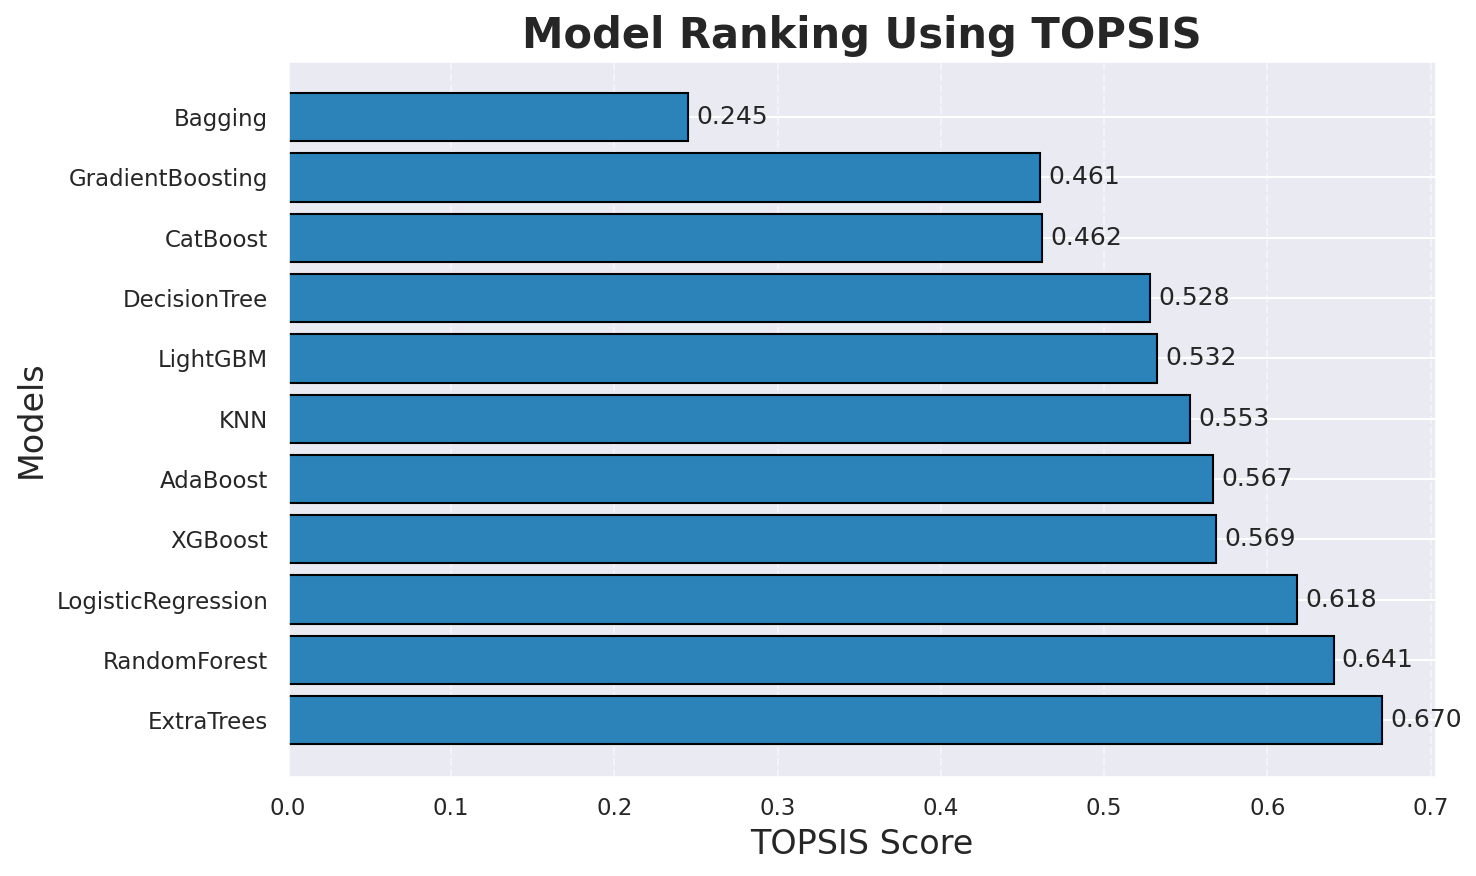

In [286]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6), dpi=150)
bars = plt.barh(performance_df.index, performance_df['TOPSIS_score'], color="#2b83ba", edgecolor="black")
plt.xlabel("TOPSIS Score", fontsize=16)
plt.ylabel("Models", fontsize=16)
plt.title("Model Ranking Using TOPSIS", fontsize=20, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Annotate score on bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.005, bar.get_y() + bar.get_height()/2,
             f"{width:.3f}", va='center', fontsize=12)

plt.tight_layout()
plt.show()


In [7]:
import shap
import matplotlib.pyplot as plt

# Identify the best model from the previous analysis (ExtraTrees had the highest TOPSIS score)
best_model_name = performance_df.index[0]  # Get the model with Rank 1
best_model = final_models[best_model_name]

print(f"Performing SHAP analysis for the best model: {best_model_name}")

# Ensure X_test_sel is a DataFrame for SHAP plots
# If it's a numpy array after previous operations, convert it back
if not isinstance(X_test_sel, pd.DataFrame):
    X_test_sel = pd.DataFrame(X_test_sel, columns=selected_features)

# Create a SHAP explainer
# For tree-based models like ExtraTrees, TreeExplainer is appropriate
explainer = shap.TreeExplainer(best_model)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test_sel)

# --- SHAP Summary Plot (Bar Chart) ---
print("\nGenerating SHAP Summary Plot (Bar Chart)...")
shap.summary_plot(shap_values[1], X_test_sel, plot_type="bar", show=False)
plt.title(f"SHAP Feature Importance for {best_model_name}")
plt.tight_layout()
plt.show()

# --- SHAP Waterfall Plot for a single instance ---
print("\nGenerating SHAP Waterfall Plot for a single instance...")
# Select an instance from the test set (e.g., the first one)
instance_index = 0
instance_data = X_test_sel.iloc[instance_index]
instance_shap_values = explainer.shap_values(instance_data)

# Waterfall plot for the positive class (assuming binary classification)
shap.plots.waterfall(shap.Explanation(values=instance_shap_values[1],
                                      base_values=explainer.expected_value[1],
                                      data=instance_data,
                                      feature_names=X_test_sel.columns.tolist()))
plt.suptitle(f"SHAP Waterfall Plot for Instance {instance_index} ({best_model_name})")
plt.tight_layout()
plt.show()

NameError: name 'performance_df' is not defined

Radar plot of metrics + TOPSIS ranking

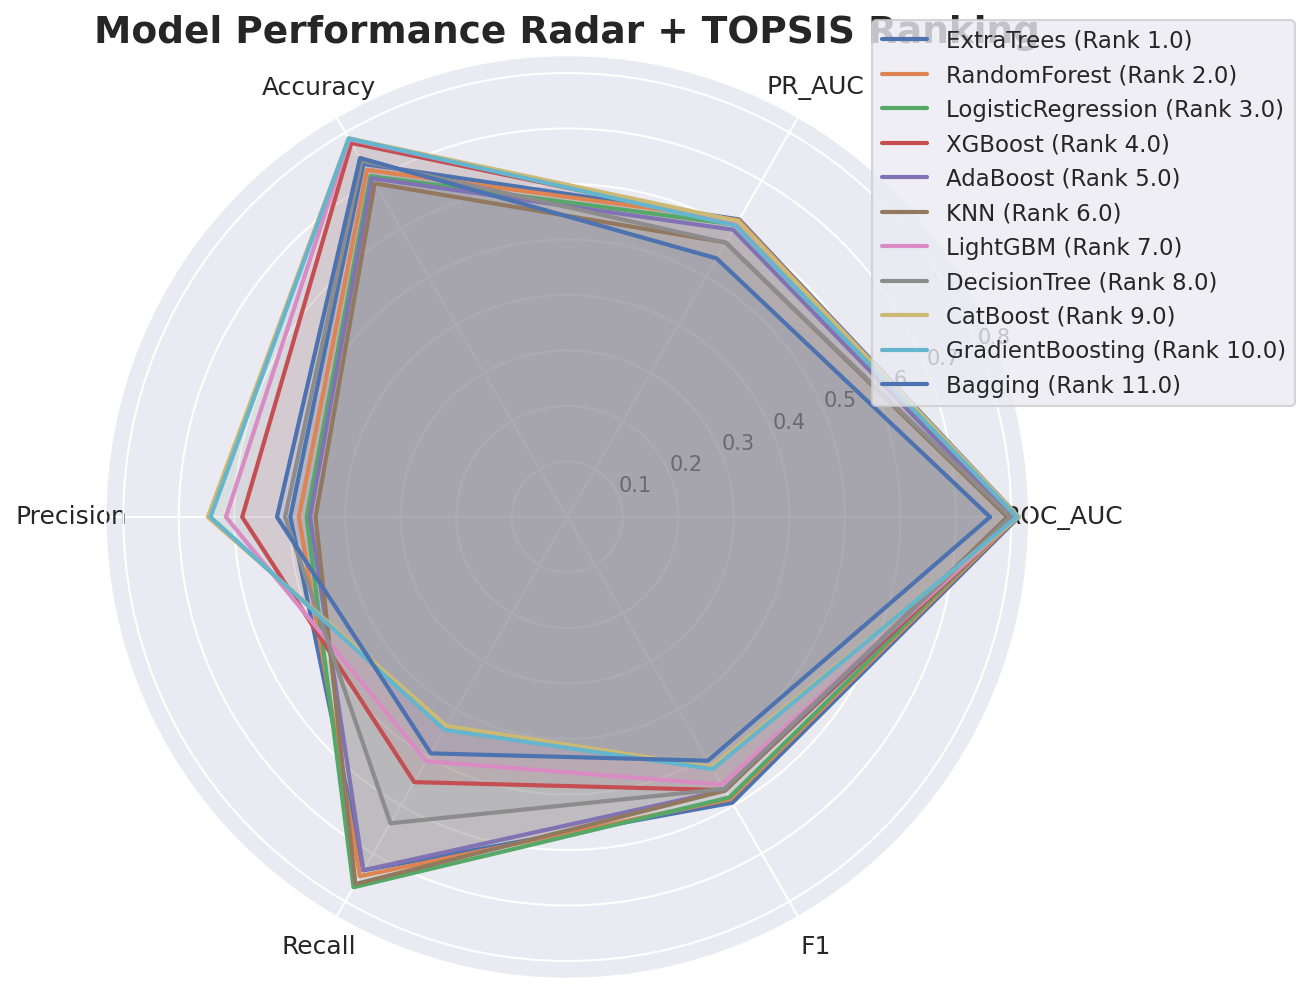

In [287]:
from math import pi

# Metrics for radar
metrics = ["ROC_AUC", "Accuracy", "Precision", "Recall", "F1"]
num_metrics = len(metrics)

# Angle for each axis
angles = [n / float(num_metrics) * 2 * pi for n in range(num_metrics)]
angles += angles[:1]  # complete circle

plt.figure(figsize=(8,8), dpi=150)
ax = plt.subplot(111, polar=True)

# Plot each model
for idx, row in performance_df.iterrows():
    values = row[metrics].tolist()
    values += values[:1]  # complete circle
    ax.plot(angles, values, linewidth=2, label=f"{idx} (Rank {row['Rank']})")
    ax.fill(angles, values, alpha=0.1)

plt.xticks(angles[:-1], metrics, fontsize=12)
plt.yticks(fontsize=10)
plt.title("Model Performance Radar + TOPSIS Ranking", fontsize=18, fontweight='bold')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.05))
plt.show()
